In [1]:
import numpy as np
import time
import stock
import kline
import choose
import math

In [2]:
def K(code):
    c,k,d = stock.loadKline(code)
    
    macdR = choose.macdRange(k)
    #扩大一个，并且放置向前溢出
    macdR[:,0]-=1
    if macdR[0,0]<0:
        macdR[0,0] = 0 
    pt = choose.intersectionIndexs([
        choose.rangeToIndexs(macdR),
        choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,15)),
        choose.volumeMaIndexs(k,1.5,20),
        choose.priceMaIndexs(k,20),
        choose.priceGrowIndexs(k)
    ])
    pt = choose.rangeFirstIndexs(macdR,pt,len(k))    
    
    bwi = choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,15))
    bw = np.zeros((len(k)))               
    bw[bwi] = 0.2
                               
    kline.Plote(code,'d',config={
    'boll':20,
    'macd':False,
    'vlines':[
        {
            'x':pt,
            'linewidth':2,
            'color':'red',
            'linestyle':'-.'
        }
    ],
    'figure':[
        [{
        'data':bw,
        'color':'blue'
        }]
    ]
    }).show()

In [3]:
K('SH:600460')

Box(children=(Button(description='上一页', style=ButtonStyle()), Button(description='下一页', style=ButtonStyle()), …

Output()

# boll通道内部成交量放大临近macd金叉买入，价格下20均线卖出

In [4]:
def compareMacdAndBollMa20Plot(code):
    c,k,d = stock.loadKline(code)
    macdR = choose.macdRange(k)
    #扩大一个，并且放置向前溢出
    macdR[:,0]-=1
    if macdR[0,0]<0:
        macdR[0,0] = 0 
    buy = choose.intersectionIndexs([
        choose.rangeToIndexs(macdR),
        choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,20)),
        choose.volumeMaIndexs(k,2,20),
        choose.priceMaIndexs(k,20),
        choose.priceGrowIndexs(k)
    ])
    
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    #sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    ma20 = stock.maK(k,20)
    sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    
    t0 = choose.buySellMatch(buy,sell)
    
    macd = choose.macdRange(k)
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0874534233264066 成功率 0.4230769230769231
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0768335199411174 平移最佳成功率： 0.6153846153846154


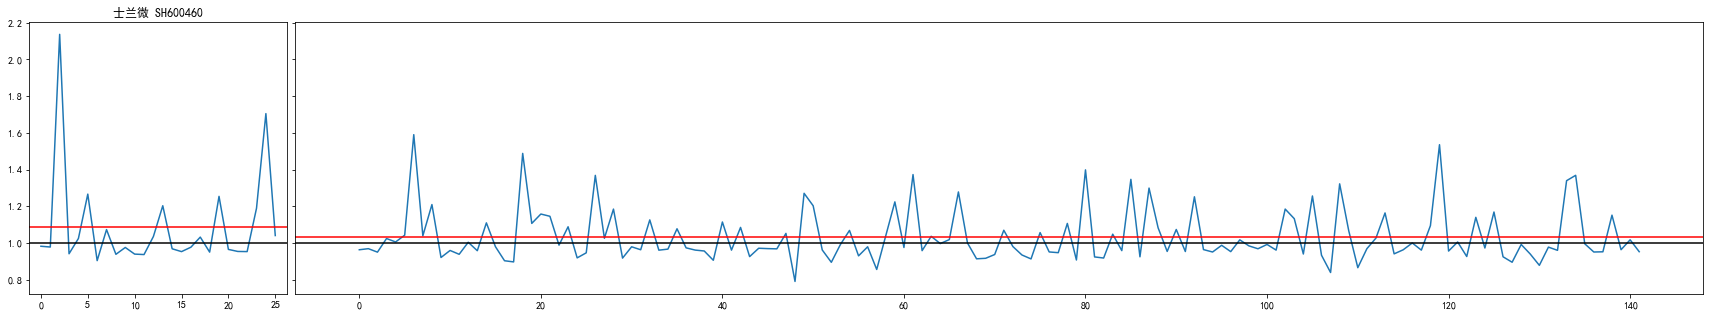

In [5]:
compareMacdAndBollMa20Plot('SH:600460')

# 在周macd>0下面做日macd买入6,20均线死叉卖出

In [6]:
def compareMacdAndWeekMacdPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wmacd,_ = stock.macd(wk)
    wd = stock.scaleTo1d(wmacd,len(k))
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.argWhere(wd>0),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0600318093287404 成功率 0.5531914893617021
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0467444298789974 平移最佳成功率： 0.46808510638297873


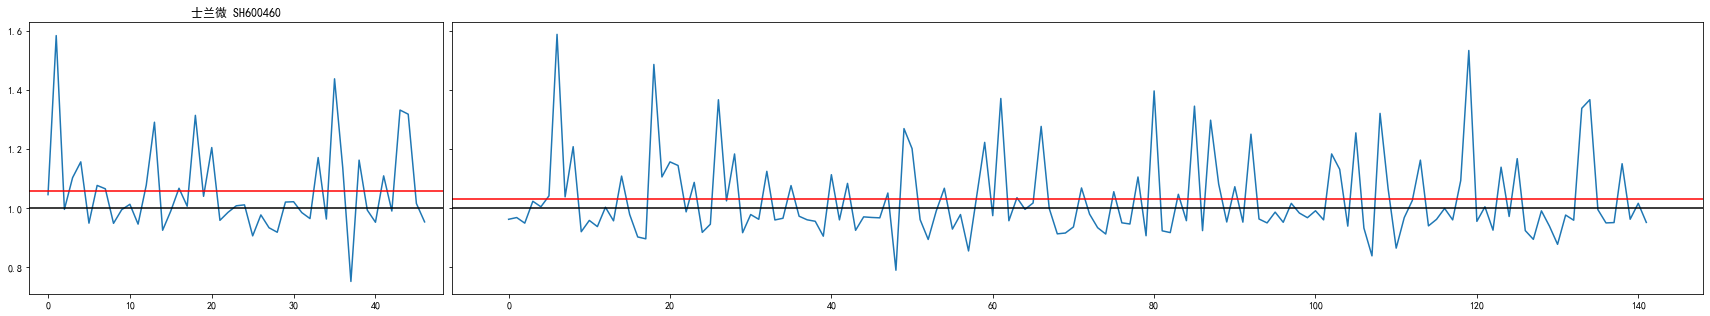

In [7]:
compareMacdAndWeekMacdPlot('SH:600460')

# 在周macd斜率向上做日macd买入，6,20均线死叉或者macd死叉卖出

In [8]:
def compareMacdAndWeekMacdSlopPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wmacd,_ = stock.macd(wk)
    wd = stock.scaleTo1d(wmacd,len(k))
    wds = wd[1:]-wd[0:-1]
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.argWhere(wds>0),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0659285629406812 成功率 0.6875
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0878392354397337 平移最佳成功率： 0.5625


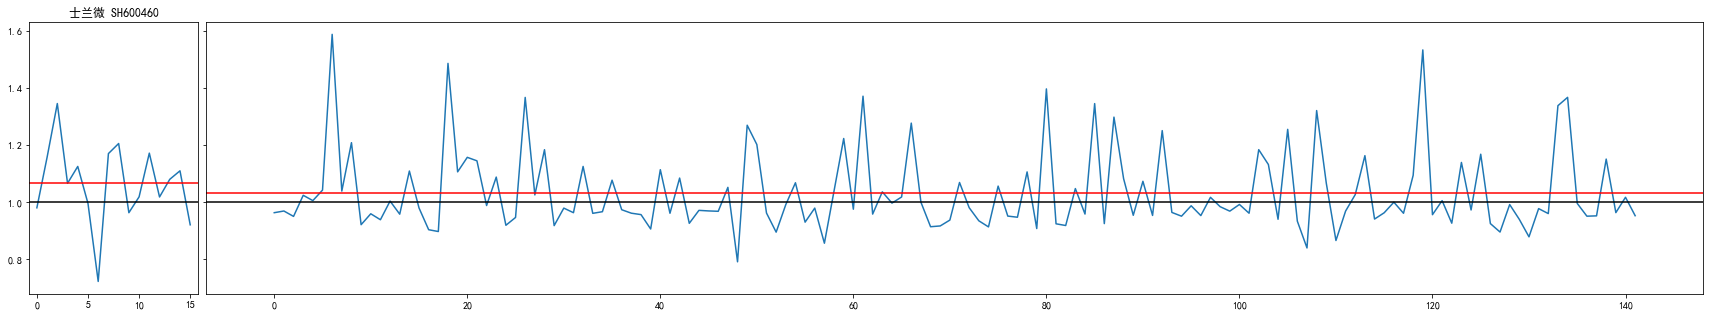

In [9]:
compareMacdAndWeekMacdSlopPlot('SH:600460')

# 在周ma20斜率向上做日macd买入6,20均线死叉卖出

In [10]:
def compareMacdAndWeekMaSlopPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wma20 = stock.maK(wk,20)
    wds = stock.scaleTo1d(wma20,len(k))
    wdss = (wds[1:]-wds[0:-1])/wds[0:-1]
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.argWhere(wdss>0),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0751877199779327 成功率 0.7142857142857143
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0912575039557215 平移最佳成功率： 0.5714285714285714


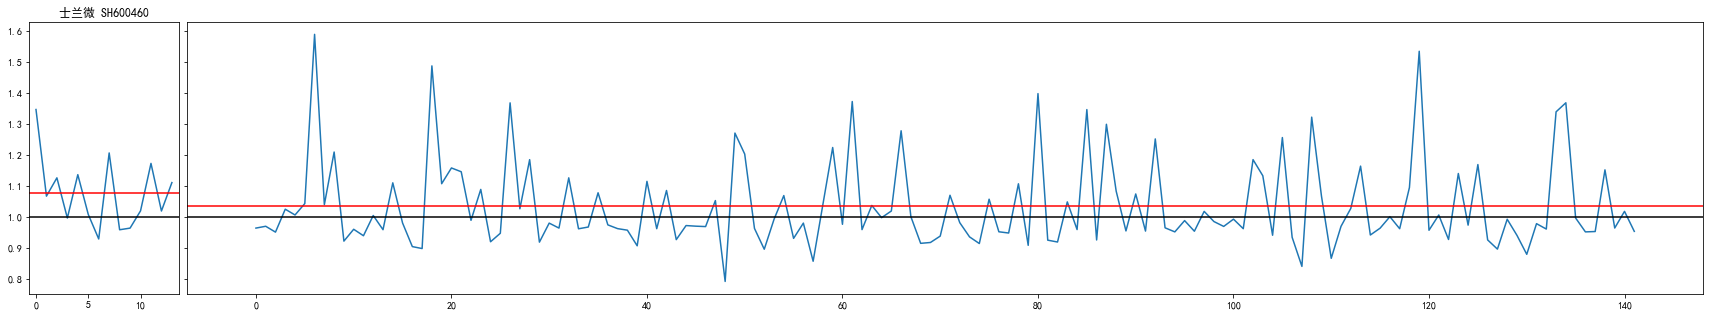

In [11]:
compareMacdAndWeekMaSlopPlot('SH:600460')

# 在周kdj j<10的后半部分macd买入, 6,20均线死叉卖出

In [12]:
def compareMacdAndWeekKDJJValuePlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wkdj = stock.kdjK(wk,9)
    wkdj = stock.scaleTo1d(wkdj[:,2],len(k))
    jr = choose.argRange(wkdj<10)
    for b in jr:
        b[0] = math.floor((b[0]+b[0])/2)
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.rangeToIndexs(jr),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 0.9697836621781596 成功率 0.2962962962962963
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0721387669051472 平移最佳成功率： 0.5925925925925926


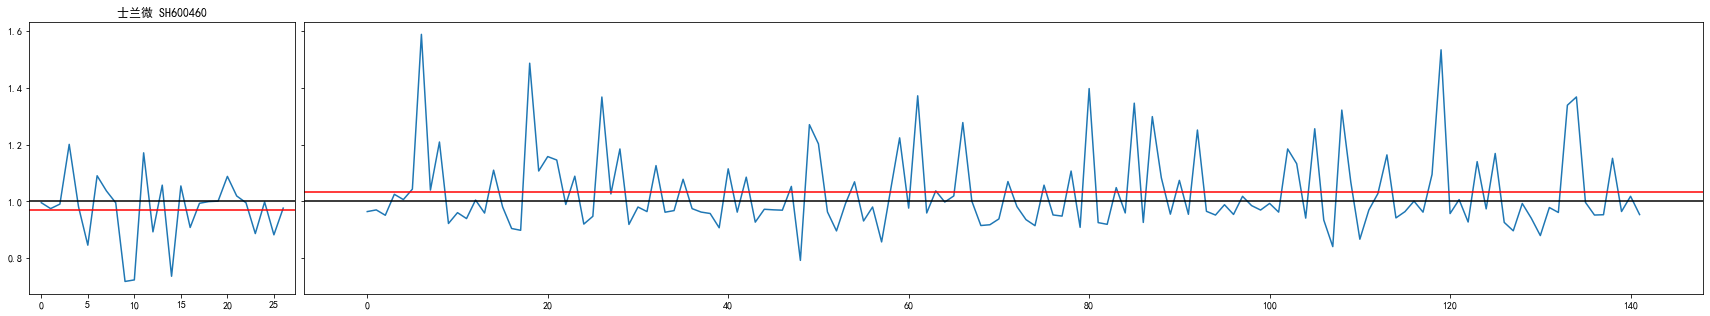

In [13]:
compareMacdAndWeekKDJJValuePlot('SH:600460')

# 成交量放大结合macd金叉点

In [24]:
def compareMacdAndVolumeMacdPlot(code):
    c,k,d = stock.loadKline(code)
    
    macdR = choose.macdRange(k)
    #扩大一个，并且放置向前溢出
    macdR[:,0]-=1
    if macdR[0,0]<0:
        macdR[0,0] = 0 
        
    #买入点是在周macd>0区域内的日金叉点
    pt = choose.intersectionIndexs([
        choose.volumeMaIndexs(k,2),
        choose.priceGrowIndexs(k),
        choose.rangeToIndexs(macdR),
    ])
    buy = choose.rangeFirstIndexs(macdR,pt,len(k))
    
    sell = choose.macdRange(k)[:,1] #macd死叉出
    #sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    t0 = choose.buySellMatch(buy,sell)
    
    macd = choose.macdRange(k)
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0379625071673935 成功率 0.4788732394366197
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0393142488934672 平移最佳成功率： 0.43661971830985913


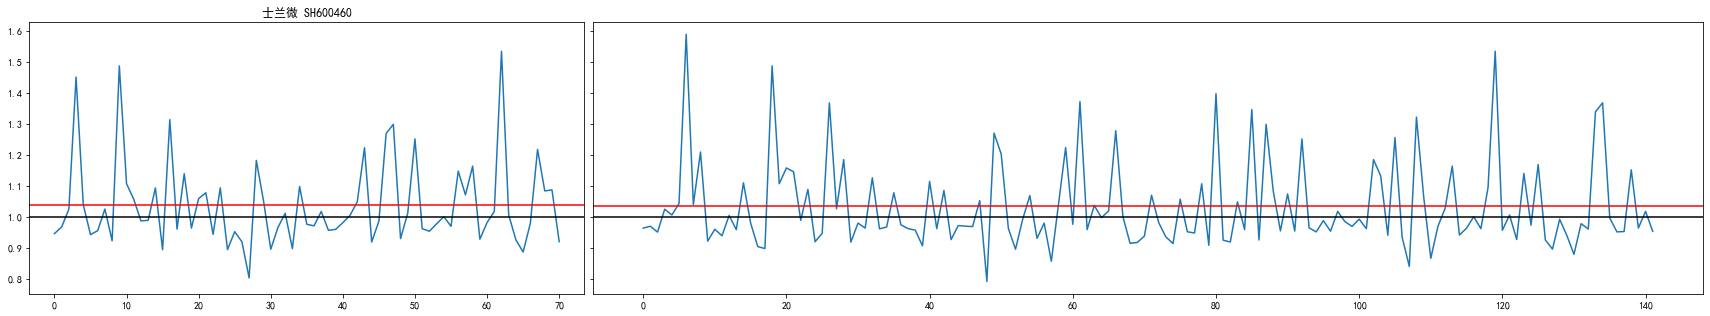

In [25]:
compareMacdAndVolumeMacdPlot('SH:600460')

# kdj猜测macd<0的最低点和最高点交易，优于macd金叉死叉

In [16]:
def compareMacdAndKDJMacdPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wkdj = stock.kdjK(wk,9)
    wkdj = stock.scaleTo1d(wkdj[:,2],len(k))
    jr = choose.argRange(wkdj<10)
    for b in jr:
        b[0] = math.floor((b[0]+b[0])/2)  
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.rangeToIndexs(jr),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

# boll结合macd可变周期

In [17]:
def compareMacdAndBollMacdPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    wk = stock.mergeK(k,5)
    wkdj = stock.kdjK(wk,9)
    wkdj = stock.scaleTo1d(wkdj[:,2],len(k))
    jr = choose.argRange(wkdj<10)
    for b in jr:
        b[0] = math.floor((b[0]+b[0])/2)
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.rangeToIndexs(jr),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

# 大周期均线斜率向上，macd金叉进死叉出

In [18]:
def compareMacdAndBigMAMacdPlot(code):
    c,k,d = stock.loadKline(code)
    macd = choose.macdRange(k)
    
    maB = stock.maK(k,30)
    maBS = maB[1:]-maB[0:-1]
    #买入点是在周macd>0区域内的日金叉点
    buy = choose.intersectionIndexs([
        choose.argWhere(maBS>0),
        choose.macdRange(k)[:,0],
    ])
    #sell = choose.macdRange(k)[:,1] #macd死叉出
    sell = choose.maRange(k,6,20)[:,1] #6,20均线死叉出
    #ma20 = stock.maK(k,20)
    #sell = choose.argWhere(k[:,4]<ma20) #20均线下出
    t0 = choose.buySellMatch(buy,sell)
    
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

平均收益 1.0410008245005196 成功率 0.49019607843137253
平均收益 1.0332553352608709 成功率 0.4014084507042254
平移最佳平均收益： 1.0450204950886948 平移最佳成功率： 0.45098039215686275


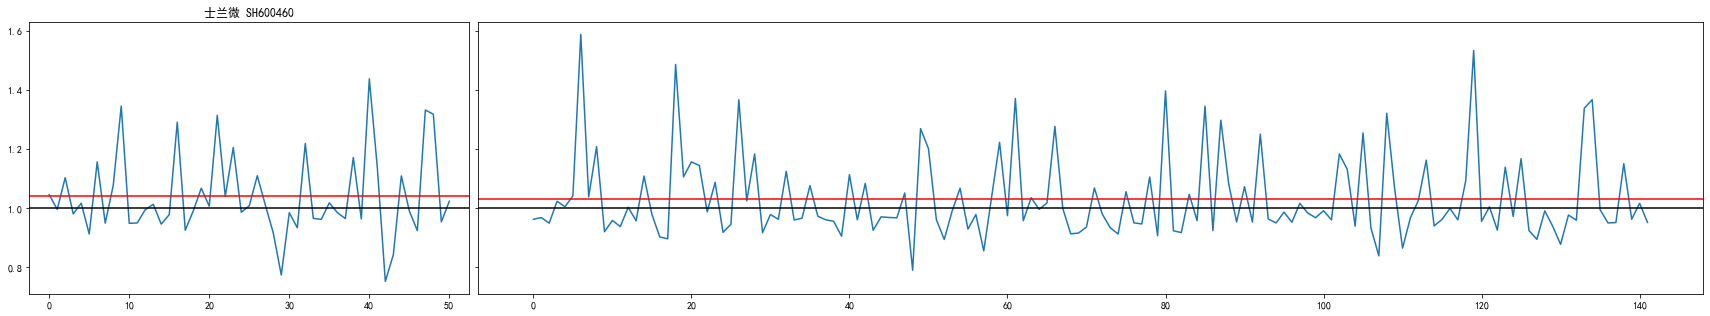

In [19]:
compareMacdAndBigMAMacdPlot('SH:600460')

# macd<0的区间的加价格差和macd波形差，成交量来判断是否接入